In [1838]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [1839]:
#Load data file
df = pd.read_csv('ex21.csv', header=None)
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [1840]:
X = np.array(df.loc[:,[0,1]])
y = np.array(df.loc[:,[2]])

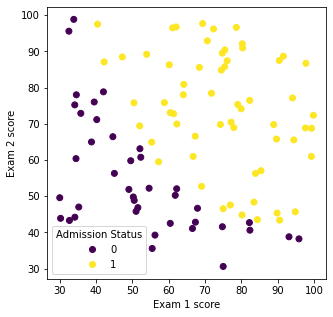

In [1841]:
#Vizualize data
fig = plt.figure(figsize=(5,5))
plt.scatter(df.loc[:,0],df.loc[:,1], c=df.loc[:,2], cmap='viridis')

#target variable
labels = df.loc[:,2].unique()

#normalize target variable for color scheme selection
norm = plt.Normalize(df.loc[:,2].min(), df.loc[:,2].max())
cmap = plt.get_cmap('viridis')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
handles = [plt.Line2D([0, 0], [0, 0], color=cmap(norm(i)), marker='o', linestyle='', label=label) for i, label in enumerate(labels)]
plt.legend(handles=handles, title='Admission Status')



In [1842]:
#Sigmoid fucntion
def sigmoid (z):
    return (1.0/(1+(np.exp(-z))))


In [1843]:
#Hypothesis/ model
def h (theta, X):
    z = sigmoid(np.dot(X, theta))
    return z


In [1844]:
#Cost function
def compute_cost(theta, X, y):

    m = X.shape[0]
    #epsilon is used to avoid logs of 0s.
    epsilon = 1e-9

    t1 = np.dot( y.T,  np.log(h(theta, X)+ epsilon   ))
    t2 = np.dot( (1-y.T) ,  np.log( (1-h(theta, X)) +  epsilon ) )

    cost =  (-1/m) * np.sum (t1+t2)  

    return cost

In [1845]:
#implementing gradient discent
def gradient_discent(X, y, alpha, num_iter):
    
    m = X.shape[0]
    
    cost_history = []

    #initialize theta
    theta_fin = np.zeros((X.shape[1],1)) 

    #Adding all-ones column to X 
    #X = np.insert(X, 0, np.ones(X.shape[0]), axis = 1)
    
    #get prediction and compute cost
    for i in range(1,num_iter+1):

        #gradient calculations
        gradients = (1/m) * np.dot( X.T, (h(theta_fin, X) - y) )

        #Update theta
        theta_fin = theta_fin - (alpha * gradients)

        #compute new cost with updated theta
        y_hat_new = h(theta_fin, X)

        new_cost = compute_cost(theta_fin, X, y)

        cost_history.append(new_cost)

        print("Iteration : ",i, "cost : ",new_cost)#, "params : ", theta_fin)

    return cost_history, theta_fin, X, y, y_hat_new      


    

In [1846]:
%%capture
# Let's see how this works
#Setup params
alpha = 0.001
num_iter = 100000
X = np.insert(X, 0, np.ones(X.shape[0]), axis = 1)
history, params, X_df, y_df, y_pred = gradient_discent (X, y, alpha, num_iter)

Text(0.5, 1.0, 'Cost')

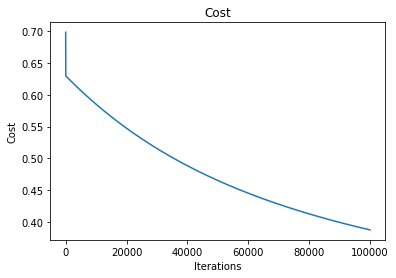

In [1847]:
#Illustrate how the cost function converges 
plt.plot(history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost")

In [1848]:
#Here we us the SciPy's implementation of Nelder-Mead Simplex algorithm for finding the optimal theta values that minimizes the compute_cost function. 
from scipy import optimize

theta = np.zeros((X.shape[1],1)) 
alpha = 0.001

theta = optimize.fmin(compute_cost, x0=theta.T, args= (X, y), maxiter= num_iter)


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [1849]:
#The theta values mentioned above can be passed to our compute_cost function and validate the results

compute_cost(theta, X, y)


0.2034977001503247

<b>Plotting decision boundary</b>

Decision boundary exists when h(theta, X) returns 0. Equation of a straight line is y=mx+c. In this case, where we have two variables $x_1$ and $x_2$, the equation is as below.

$theta_1*x_1 + theta_2*x_2 + theta_0 = 0$

For given $x_1$ values, $x_2$ values can be obtained by,

$x2 = - (theta_1 * x_1 + theta_0) / theta_2$





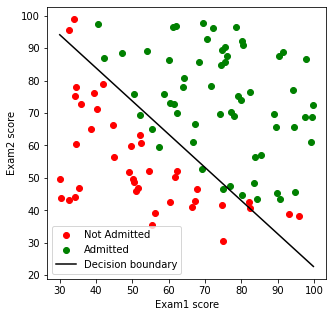

In [1850]:
#Vizualizing decision boundary


#Vizualize data
fig = plt.figure(figsize=(5,5))
plt.scatter(x=df[df.loc[:,2]==0].loc[:,0],y=df[df.loc[:,2]==0].loc[:,1], c='red', label='Not Admitted')
plt.scatter(x=df[df.loc[:,2]==1].loc[:,0],y=df[df.loc[:,2]==1].loc[:,1], c='green', label='Admitted')

#vizualizing decision boundary for two diamentional dataset

#select x1 values (min and max)
x1 = [np.min(X[:, 1]),np.max(X[:, 1])]

#transform x1 to get x2 values based on theta (parameter) values
x2 = -(theta[0] + np.array(theta[1])*np.array(x1)) / theta[2]

#decision boundary
plt.plot( x1, x2, c='black', label='Decision boundary')


plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.legend()


In [1851]:
#function h() returns the admission probability.
#A studentwho has scored 80.0 and 75.0 marks respectively in exam1 and exam2
#has a 0.99 probability of getting an admission.

h(theta,np.array([1, 80.,75.]))

0.9984181390475003

In [1852]:
#Making predictions 
def pred (theta, X):

    #If classification probability > 0.5 classify it as 1 (True) else as 0 (False).
    return h(theta, X)>=0.5

In [1853]:
#predictions
y_pred = np.array(pred(theta, X))
y_actual = y.reshape(-1).astype(bool)

In [1854]:
#Evaluation
def evaluation (df, y_pred, y_actual):
    #Negative class indices
    neg_examples = df.index[df.loc[:,2]==0].tolist()

    #Positive class indices
    pos_examples = df.index[df.loc[:,2]==1].tolist()

    #prediction accuracy
    neg_correct_classifications = np.sum(y_pred[neg_examples]==y_actual[neg_examples])
    pos_correct_classifications = np.sum(y_pred[pos_examples]==y_actual[pos_examples])

    #Accuracy
    total = df.shape[0]
    accuracy = (neg_correct_classifications+pos_correct_classifications)/total
    print('Accuracy : ',accuracy )

    #Precisoin - out of all identified postives how many are real positives
    #Precision = TP / (TP+FP)

    precision= pos_correct_classifications / (pos_correct_classifications + np.sum(y_pred[neg_examples]==1))
    print('Precision : ', precision)

    #Recall - out of all postives how many real positives are identified
    #Recall = TP / (TP+FN)

    recall= pos_correct_classifications / (pos_correct_classifications + np.sum(y_pred[pos_examples]==0))
    print('Recall : ', recall)


In [1855]:
evaluation (df, y_pred, y_actual)

Accuracy :  0.89
Precision :  0.9016393442622951
Recall :  0.9166666666666666


<b>Regularized logistic regression</b>

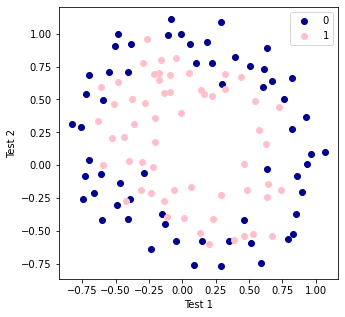

In [1856]:
df = pd.read_csv('ex22.csv', header=None)

X = np.array(df.loc[:,[0,1]])
y = np.array(df.loc[:,[2]])

#Vizualize data
fig = plt.figure(figsize=(5,5))
plt.scatter(x=df[df.loc[:,2]==0].loc[:,0],y=df[df.loc[:,2]==0].loc[:,1], c='darkblue', label='0')
plt.scatter(x=df[df.loc[:,2]==1].loc[:,0],y=df[df.loc[:,2]==1].loc[:,1], c='pink', label='1')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()

In [1857]:
#Here, we change the compute_cost function to add a regularization term
def compute_cost_reg(theta, X, y, lamda):

    m = X.shape[0]
    #epsilon is used to avoid logs of 0s.
    epsilon = 1e-9

    t1 = np.dot( y.T,  np.log(h(theta, X)+ epsilon   ))
    t2 = np.dot( (1-y.T) ,  np.log( (1-h(theta, X)) +  epsilon ) )

    reg_term =(lamda/(2*m)) * np.sum(theta[1:]**2)

    cost =  ((-1/m) * np.sum (t1+t2)) +  reg_term

    return cost

In [1858]:
#Cost of regularized logistic regression with 0 theta values

lamda = 0.01

X = np.array(df.loc[:,[0,1]])
y = np.array(df.loc[:,[2]])

theta_poly = np.zeros((X.shape[1],1)) 
lamda = 0.0001
compute_cost_reg(theta_poly, X, y, lamda)


0.6931471785599457

In [1859]:
#Create polynomial data. Here, we use PolynomialFeatures function from sklearn package. 
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 6, interaction_only =False)
x_poly = poly.fit_transform(X)


In [1860]:
#Here we us the SciPy's implementation of Nelder-Mead Simplex algorithm for finding the optimal theta values that minimizes the compute_cost function. 
from scipy import optimize

theta_poly = np.zeros((x_poly.shape[1],1)) 
alpha = 0.1
lamda = 0.00001
num_iter = 100000
theta_poly = optimize.fmin(compute_cost_reg, x0=theta_poly.T, args= (x_poly, y, lamda), maxiter= num_iter)


Optimization terminated successfully.
         Current function value: 0.369698
         Iterations: 18320
         Function evaluations: 21801


In [1869]:
#This part is mainly based on the work carried out in https://www.kaggle.com/code/ashishrane7/logistic-regression-non-linear-decision-boundary/notebook

def vizualize_decision_boundary(deg, theta, df):

    #Return evenly spaced numbers over a specified interval.
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)

    #Create a rectangular grid out of an array of x and y values. 
    U,V = np.meshgrid(u,v)

    #Flatten the arrays
    U = np.ravel(U)
    V = np.ravel(V)

    #Create dataframes
    ud = pd.DataFrame(U)
    vd = pd.DataFrame(V)
    uvd = pd.concat([ud,vd],axis=1)
    uvd.columns = ['x1','x2']

    Z = np.zeros((len(u) * len(v)))

    #Polynomial feature creation
    poly = PolynomialFeatures(degree = deg, interaction_only =False)
    x_poly = poly.fit_transform(uvd)

    Z = x_poly.dot(theta)

    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))



    #Vizualize data
    fig = plt.figure(figsize=(5,5))
    plt.scatter(x=df[df.loc[:,2]==0].loc[:,0],y=df[df.loc[:,2]==0].loc[:,1], c='darkblue', label='0')
    plt.scatter(x=df[df.loc[:,2]==1].loc[:,0],y=df[df.loc[:,2]==1].loc[:,1], c='pink', label='1')
    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    plt.title('Degree of polynomial : '+ str(deg))

    #plot decision boundary
    cs = plt.contour(U,V,Z,levels=[0],cmap= "CMRmap")

    plt.legend()
    

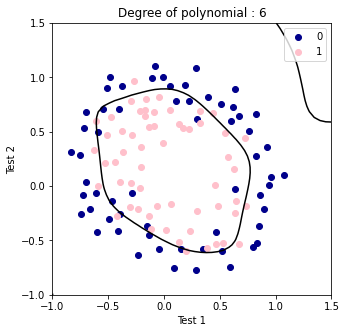

In [1870]:
vizualize_decision_boundary(6, theta_poly, df)

In [1871]:
#Intigrating model building, vizualization and evaluation together
#vizualization part is mainly based on the work carried out in https://www.kaggle.com/code/ashishrane7/logistic-regression-non-linear-decision-boundary/notebook

def vizualize_decision_boundary_integrated (deg, df, lamda, num_iter):

    #Process data
    X = np.array(df.loc[:,[0,1]])
    y = np.array(df.loc[:,[2]])

    print("\n Degree of polynomial : ", deg)
    print("--------------------------------------")

    poly = PolynomialFeatures(degree = deg, interaction_only =False)
    x_poly_actual = poly.fit_transform(X)

    theta = np.zeros((x_poly_actual.shape[1],1)) 

    theta = optimize.fmin(compute_cost_reg, x0=theta.T, args= (x_poly_actual, y, lamda), maxiter= num_iter)


    #Evaluation
    y_pred = np.array(pred(theta, x_poly_actual))
    y_actual = y.reshape(-1).astype(bool)
    print("\n")
    evaluation (df, y_pred, y_actual)

    #Decision boundary vizualization
    vizualize_decision_boundary(deg, theta, df) 
    

    print("--------------------------------------\n")

    #return theta, x_poly_actual, y
    


 Degree of polynomial :  1
--------------------------------------
Optimization terminated successfully.
         Current function value: 0.690241
         Iterations: 104
         Function evaluations: 186


Accuracy :  0.5508474576271186
Precision :  0.5454545454545454
Recall :  0.5172413793103449
--------------------------------------


 Degree of polynomial :  2
--------------------------------------
Optimization terminated successfully.
         Current function value: 0.348261
         Iterations: 1168
         Function evaluations: 1808


Accuracy :  0.8559322033898306
Precision :  0.847457627118644
Recall :  0.8620689655172413
--------------------------------------


 Degree of polynomial :  7
--------------------------------------
Optimization terminated successfully.
         Current function value: 0.340001
         Iterations: 28077
         Function evaluations: 32293


Accuracy :  0.864406779661017
Precision :  0.85
Recall :  0.8793103448275862
---------------------------

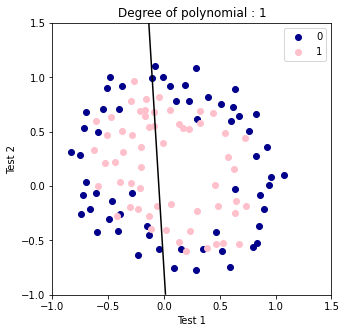

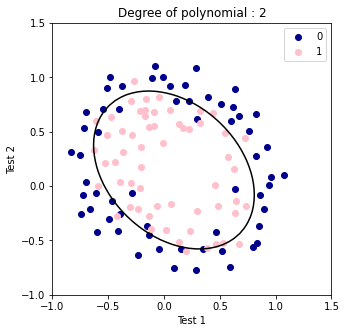

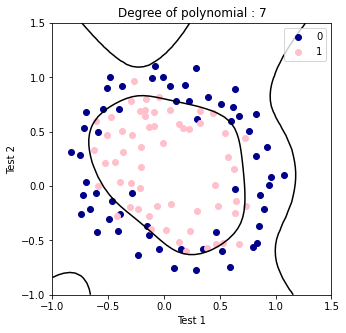

In [1873]:
vizualize_decision_boundary_integrated (1, df, 0.0001, 50000)

vizualize_decision_boundary_integrated (2, df, 0.0001, 50000)

vizualize_decision_boundary_integrated (7, df, 0.0001, 50000)

#From the results we can clearly see how a non-linear decision boundary represents the data distribution better.